# Plot examples

In [1]:
from pmd_beamphysics import ParticleGroup, particle_paths
import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,6)

from h5py import File
import os

In [2]:
# Open a file, fine the particle paths from the root attributes
# Pick one:
H5FILE = 'data/bmad_particles2.h5'
#H5FILE = 'data/distgen_particles.h5'
#H5FILE = 'data/astra_particles.h5'

# Load
h5 = File(H5FILE, 'r')
ppaths = particle_paths(h5)
ph5 = h5[ppaths[0]]

P = ParticleGroup(ph5)
ppaths

['/data/00001/particles/']

# Density plots

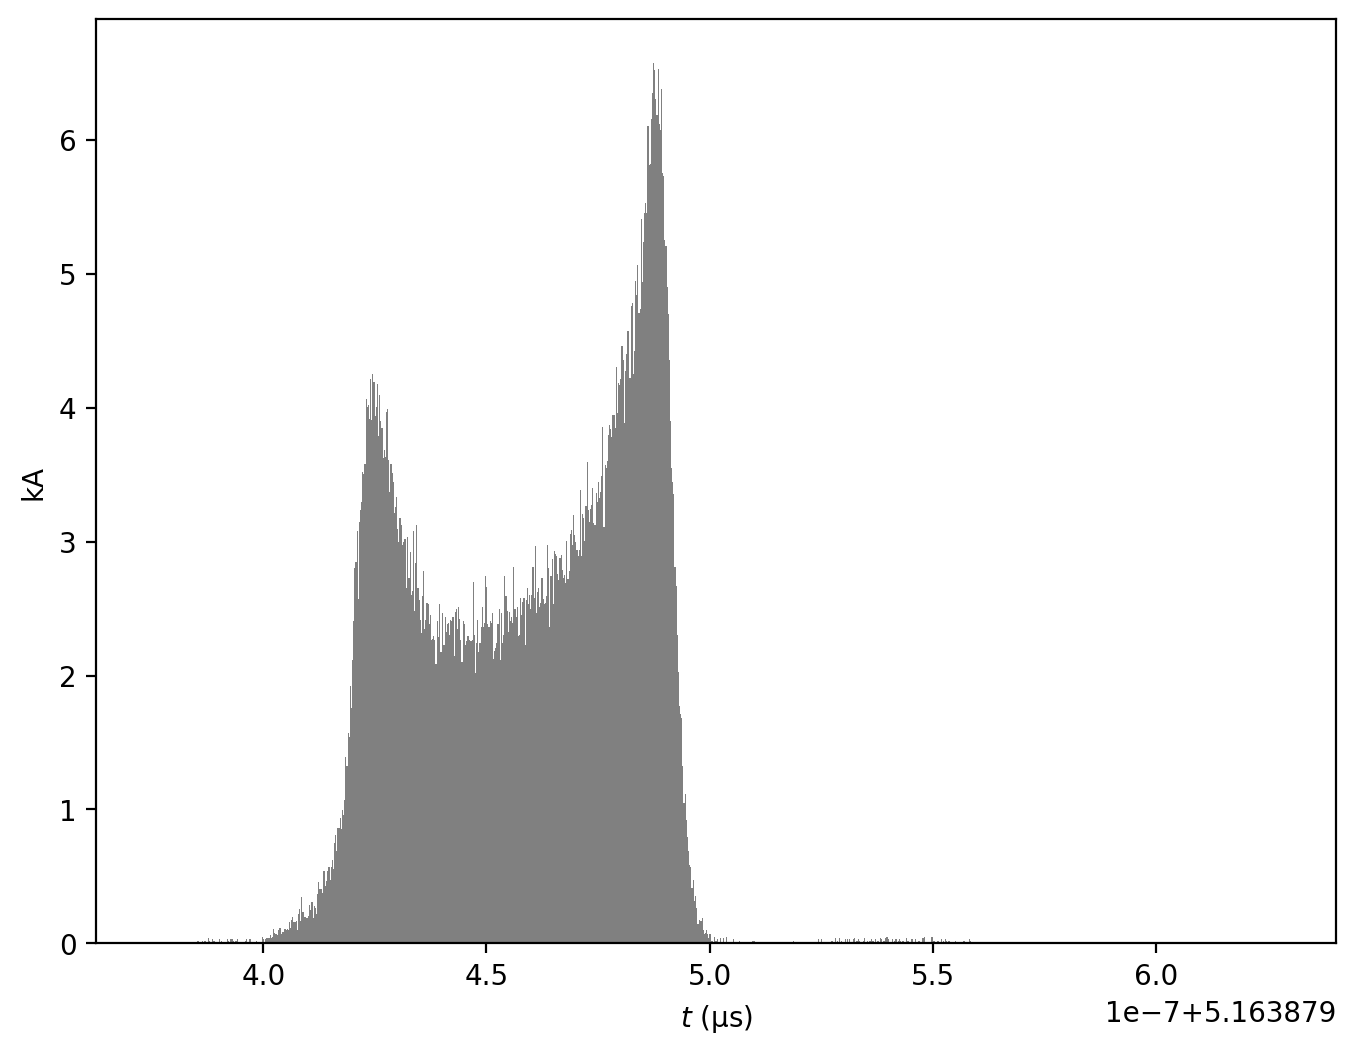

In [3]:
P.plot('t')

# Slice statistics Plots

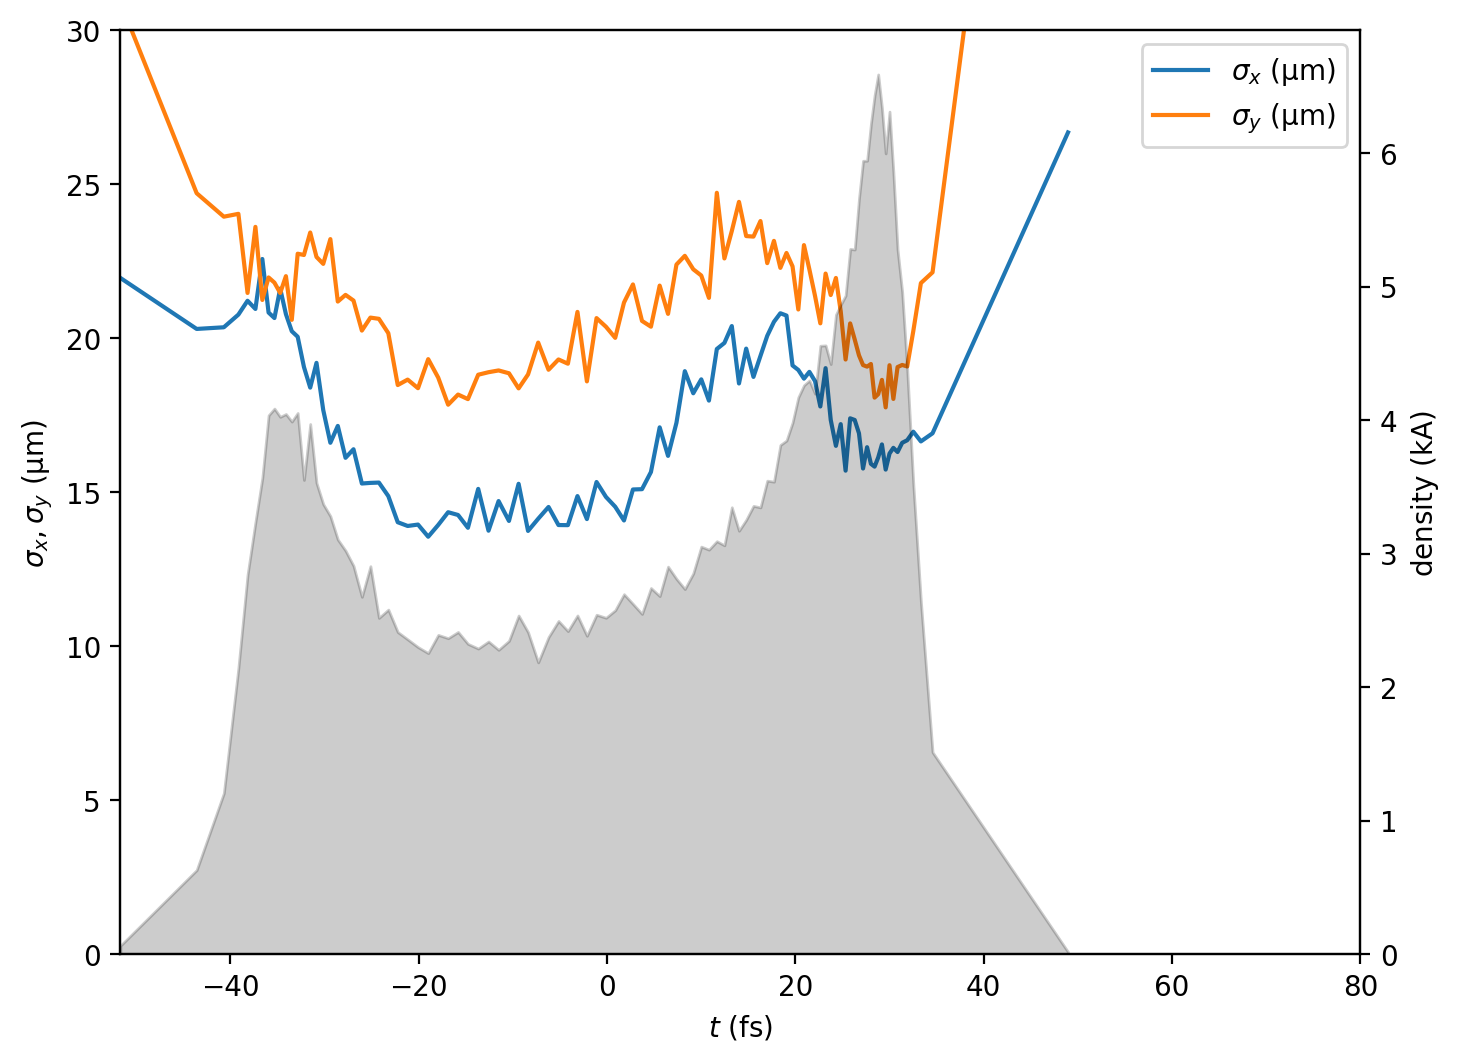

In [4]:
P.t = P.t - P['mean_t']
P.slice_plot('sigma_x', 'sigma_y', xlim=(None, 80e-15), ylim=(0, 30e-6))

# Marginal plots

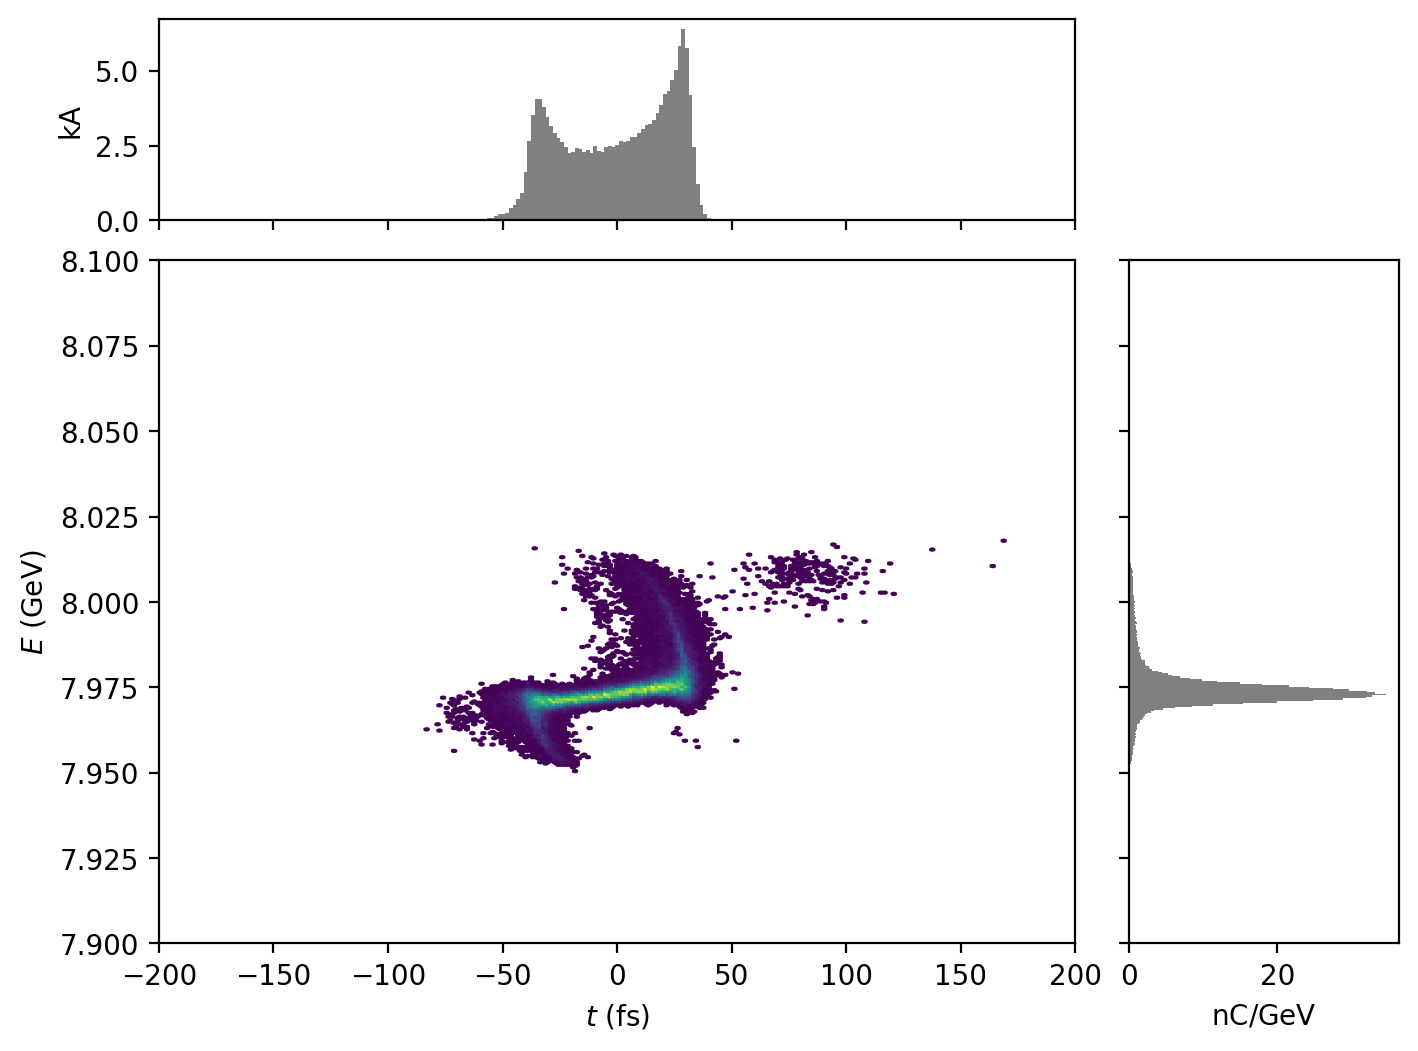

In [5]:
P.plot('t', 'energy', xlim = (-200e-15, 200e-15), ylim = (7.9e9, 8.1e9))

# Combined density and slice plot

In [6]:
from pmd_beamphysics.plot import density_and_slice_plot

In [7]:
P.species

'electron'

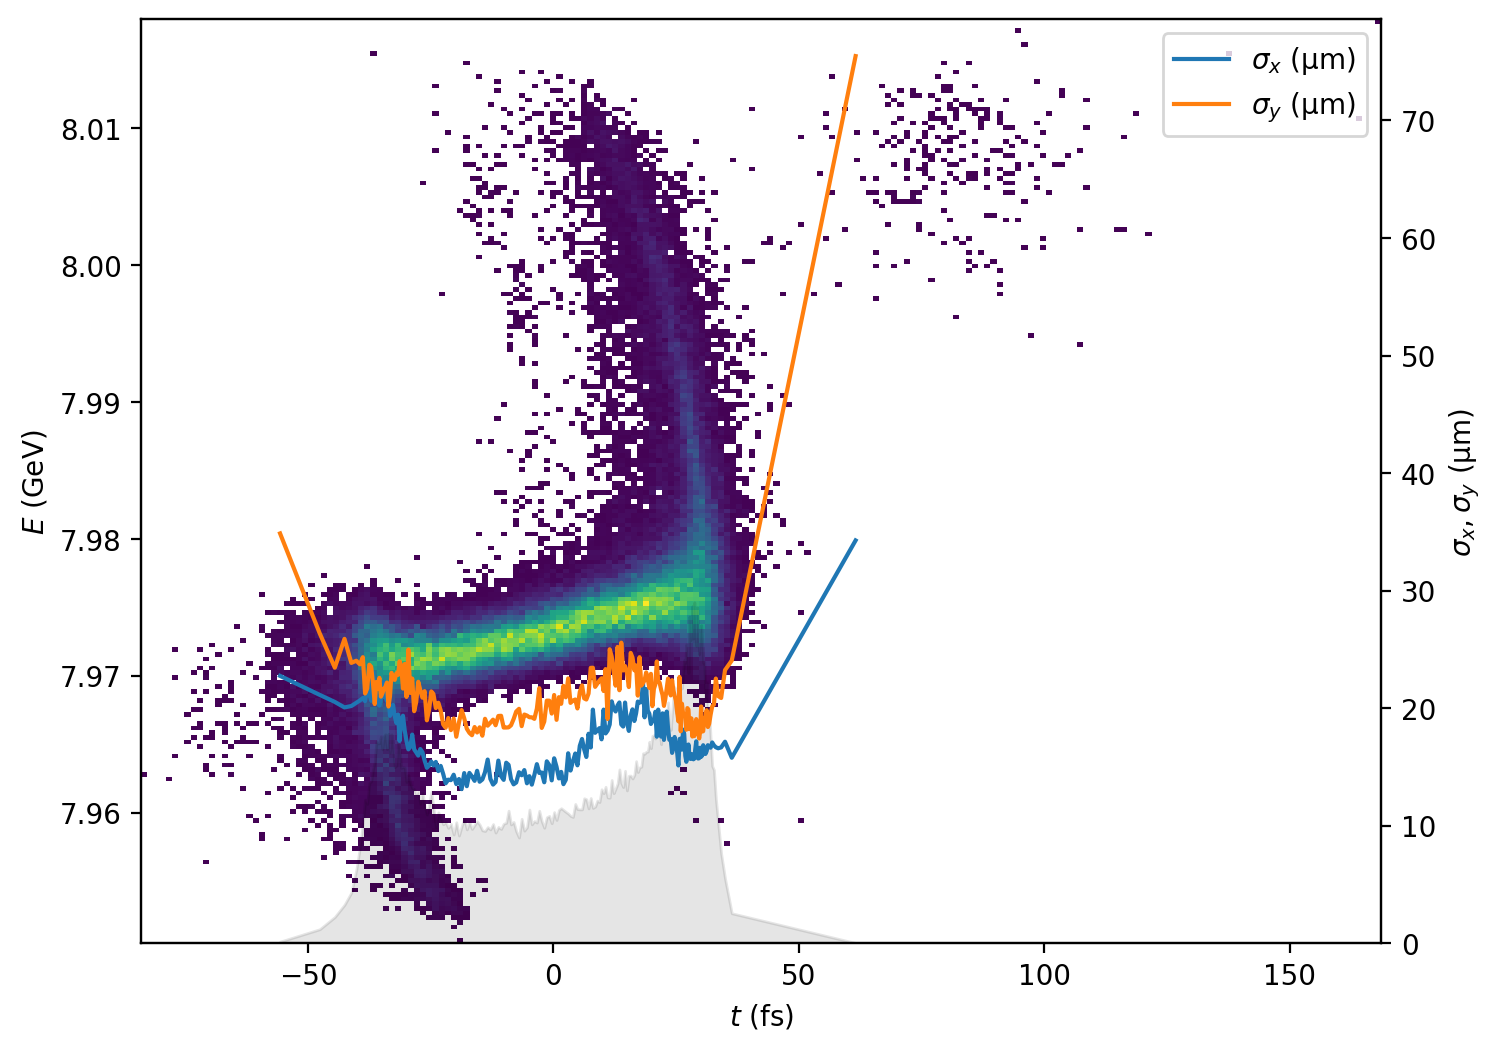

In [8]:
density_and_slice_plot(P, 't', 'energy', stat_keys = ['sigma_x', 'sigma_y'], n_slice = 200, bins=200)